<a href="https://colab.research.google.com/github/hasanahaffendy/STQD6014---Data-Science/blob/main/NUR_HASANAH_BINTI_AFFENDY_P131626_FINAL_EXAM_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Q4(a)
# start by importing Matplotlib and pandas
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load datasets into dataframes
sales_df = pd.read_csv("/content/drive/MyDrive/DataScience/sales_data.csv")
products_df = pd.read_csv("/content/drive/MyDrive/DataScience/products.csv")

# Merge datasets on Product_ID to associate product names with sales transactions
merged_df = pd.merge(sales_df, products_df, on="Product_ID")

# Calculate total sales revenue for each product
merged_df['Total_Sales'] = merged_df['Quantity'] * merged_df['Price']

# Group by product name and sum total sales revenue
total_sales_df = merged_df.groupby('Product_Name')['Total_Sales'].sum().reset_index()

print(total_sales_df)

  Product_Name  Total_Sales
0     Biscuits  6005.730580
1       Coffee  3738.186287
2         Meat  7351.175050
3         Milk  5888.964655
4      Noodles  3927.886522


In [ ]:
# Identify top 3 products with highest average quantity sold per transaction
top_products = merged_df.groupby('Product_Name')['Quantity'].mean().nlargest(3).index.tolist()
print("Top 3 Products with Highest Average Quantity Sold per Transaction:")
for i, product in enumerate(top_products, 1):
    print(f"Product {i}: {product}")

# Product with Highest Total Sales Revenue
highest_sales_product = total_sales_df.nlargest(1, 'Total_Sales')['Product_Name'].iloc[0]
print(f"\nProduct with Highest Total Sales Revenue: {highest_sales_product}")

# Product with Lowest Total Sales Revenue
lowest_sales_product = total_sales_df.nsmallest(1, 'Total_Sales')['Product_Name'].iloc[0]
print(f"Product with Lowest Total Sales Revenue: {lowest_sales_product}")

Top 3 Products with Highest Average Quantity Sold per Transaction:
Product 1: Milk
Product 2: Biscuits
Product 3: Coffee

Product with Highest Total Sales Revenue: Meat
Product with Lowest Total Sales Revenue: Coffee


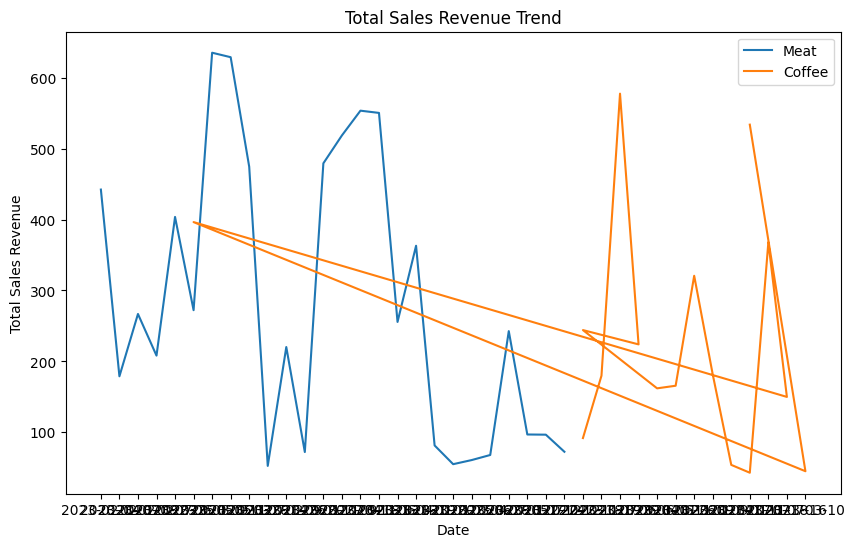

In [ ]:
# Visualize total sales revenue trend for product with highest and lowest total sales revenue
highest_sales_product = total_sales_df.nlargest(1, 'Total_Sales')['Product_Name'].iloc[0]
lowest_sales_product = total_sales_df.nsmallest(1, 'Total_Sales')['Product_Name'].iloc[0]

# Filter merged dataframe for products with highest and lowest total sales revenue
highest_sales_df = merged_df[merged_df['Product_Name'] == highest_sales_product]
lowest_sales_df = merged_df[merged_df['Product_Name'] == lowest_sales_product]

# Fill missing values using linear interpolation
highest_sales_df = highest_sales_df.interpolate(method='linear')
lowest_sales_df = lowest_sales_df.interpolate(method='linear')

# Plot total sales revenue trend
plt.figure(figsize=(10, 6))
plt.plot(highest_sales_df['Date'], highest_sales_df['Total_Sales'], label=highest_sales_product)
plt.plot(lowest_sales_df['Date'], lowest_sales_df['Total_Sales'], label=lowest_sales_product)
plt.xlabel('Date')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue Trend')
plt.legend()
plt.show()


In [ ]:
# Q4(B)
# Load datasets into dataframes
sales_df = pd.read_csv("/content/drive/MyDrive/DataScience/sales_data.csv")
products_df = pd.read_csv("/content/drive/MyDrive/DataScience/products.csv")
customers_df = pd.read_csv("/content/drive/MyDrive/DataScience/customers.csv")

# Merge sales data with products data based on Product_ID
sales_products_df = pd.merge(sales_df, products_df, on="Product_ID")

# Merge the combined sales and products data with customers data based on Customer_ID
consolidated_df = pd.merge(sales_products_df, customers_df, on="Customer_ID")

# Display or analyze the resulting consolidated DataFrame
print(consolidated_df.head())

   Transaction_ID  Product_ID        Date  Quantity      Price  Customer_ID  \
0               1           4  2023-02-04         7  63.180365           10   
1              22           5  2023-05-22         9  18.379249           10   
2              81           5  2023-01-20         3  86.770851           10   
3              44           2  2023-01-23         1  68.676513           10   
4              86           1  2023-10-18         4  25.254347           10   

  Product_Name               Name               Email    Country  
0         Meat  Samantha Crawford  levi08@example.com  Australia  
1      Noodles  Samantha Crawford  levi08@example.com  Australia  
2      Noodles  Samantha Crawford  levi08@example.com  Australia  
3     Biscuits  Samantha Crawford  levi08@example.com  Australia  
4         Milk  Samantha Crawford  levi08@example.com  Australia  


In [ ]:
# Calculate total sales revenue
consolidated_df['Total_Sales'] = consolidated_df['Quantity'] * consolidated_df['Price']

# Group by country and calculate total number of transactions and total sales revenue
country_sales_summary = consolidated_df.groupby('Country').agg(
    total_transactions=('Transaction_ID', 'nunique'),
    total_sales_revenue=('Total_Sales', 'sum')
).reset_index()

# Display the summary
print(country_sales_summary)


                        Country  total_transactions  total_sales_revenue
0                     Australia                   5          1037.682251
1                      Botswana                   1            66.979131
2                         China                   4          1274.496189
3                       Estonia                   7          2352.322046
4   Falkland Islands (Malvinas)                   9          1996.388311
5                       Grenada                   2           419.527760
6                     Hong Kong                   7          2153.117167
7                      Kiribati                   3           818.796555
8                         Macao                   4          1040.062429
9                         Malta                   6          1764.860745
10             Marshall Islands                   5          1145.120569
11                       Mexico                   5           948.728261
12                   Montenegro                  14

In [ ]:
# Group by product name and calculate total sales revenue
product_sales_summary = consolidated_df.groupby('Product_Name')['Total_Sales'].sum().reset_index()

# Sort the results in descending order based on total sales revenue
top_products = product_sales_summary.sort_values(by='Total_Sales', ascending=False).head(3)

# Display the top 3 products with the highest total sales revenue
print("Top 3 products with the highest total sales revenue:")
print(top_products)

Top 3 products with the highest total sales revenue:
  Product_Name  Total_Sales
2         Meat  7351.175050
0     Biscuits  6005.730580
3         Milk  5888.964655


In [ ]:
# Assuming 'Date' column is in datetime format
consolidated_df['Date'] = pd.to_datetime(consolidated_df['Date'])

# Group by Customer_ID and find the minimum transaction date for each customer
customer_first_transaction = consolidated_df.groupby('Customer_ID')['Date'].min().reset_index()

# Calculate customer tenure (days since their first transaction)
customer_first_transaction['Customer_Tenure'] = (pd.to_datetime('now') - customer_first_transaction['Date']).dt.days

# Merge the tenure information back to the consolidated DataFrame
consolidated_df = pd.merge(consolidated_df, customer_first_transaction[['Customer_ID', 'Customer_Tenure']], on='Customer_ID')

# Display or analyze the resulting DataFrame with the new Customer_Tenure column
print(consolidated_df.head())


   Transaction_ID  Product_ID       Date  Quantity      Price  Customer_ID  \
0               1           4 2023-02-04         7  63.180365           10   
1              22           5 2023-05-22         9  18.379249           10   
2              81           5 2023-01-20         3  86.770851           10   
3              44           2 2023-01-23         1  68.676513           10   
4              86           1 2023-10-18         4  25.254347           10   

  Product_Name               Name               Email    Country  Total_Sales  \
0         Meat  Samantha Crawford  levi08@example.com  Australia   442.262554   
1      Noodles  Samantha Crawford  levi08@example.com  Australia   165.413242   
2      Noodles  Samantha Crawford  levi08@example.com  Australia   260.312553   
3     Biscuits  Samantha Crawford  levi08@example.com  Australia    68.676513   
4         Milk  Samantha Crawford  levi08@example.com  Australia   101.017389   

   Customer_Tenure  
0              408  
1 

<ipython-input-35-ea665c51ebcc>:8: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  customer_first_transaction['Customer_Tenure'] = (pd.to_datetime('now') - customer_first_transaction['Date']).dt.days


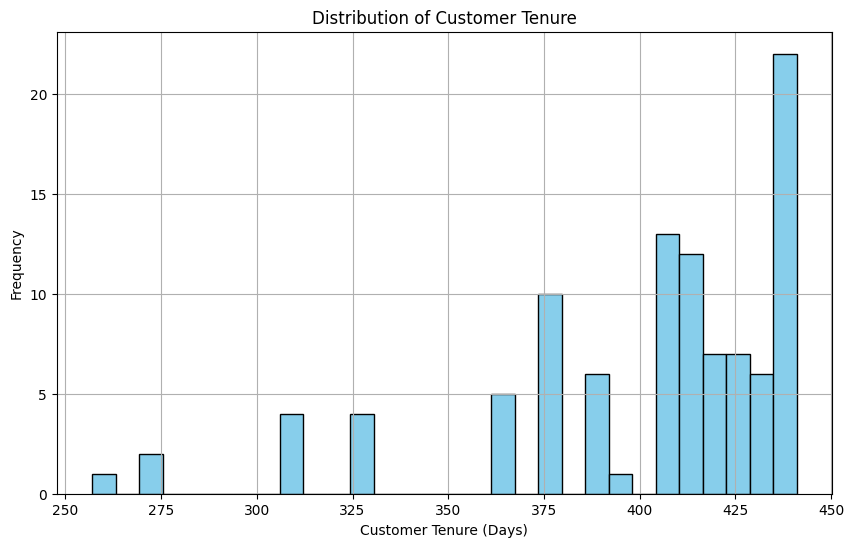

In [ ]:
# Plot histogram of customer tenure
plt.figure(figsize=(10, 6))
plt.hist(consolidated_df['Customer_Tenure'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Customer Tenure (Days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
